# <font color=red>Spark Funds Analysis</font>

> ### **Data Cleaning 1**

 - #### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import os

 - #### Reading the <font color=blue>**Companies**</font> data file in *companies* dataframe

In [2]:
companies = pd.read_csv("companies.txt", sep='\t', encoding='Palmos')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


 - #### Describing the <font color=blue>**Companies**</font> dataframe to get a high level understanding of data.<br>
    1) Checking the Unique data values in each variable of dataframe.<br>
    2) Maximum / Frequently appearing values in each variable.<br>
    3) Frequency of top appearing value.<br>
    4) Missing values in each variable of dataframe to decide the variables which are required for analysis and which can be dropped.<br>

In [3]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Sosei,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


 - #### Reading the <font color=blue>**Rounds2**</font> data file in *rounds2* dataframe

In [5]:
rounds2 = pd.read_csv("rounds2.csv", encoding='Palmos')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


 - Processing the <font color=blue>**company_permalink**</font> attribute of *rounds2* dataframe by converting the first character of each word to uppercase as the <font color=blue>**permalink**</font> attribute of *companies* dataframe is in the Title format.

In [6]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.title()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/Organization/-The-One-Of-Them-Inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


- #### Converting the *unicode* characters into *ascii* characters to process them effectively.

In [7]:
rounds2["company_permalink"] = [s.encode('ascii', 'ignore').strip() for s in rounds2["company_permalink"].str.decode('unicode_escape')]

In [8]:
companies["permalink"] = [s.encode('ascii', 'ignore').strip() for s in companies["permalink"].str.decode('unicode_escape')]

- #### Dropping the variables *'funding_round_permalink'*, *'funding_round_code'*, *'funding_at'* from **rounds2** dataframe as these variables are not significant for our analysis.
- #### Dropping the variables *'homepage_url'*, *'status'*, *'state_code'*, *'city'*, *'region'*, *'founded_at'* from **companies** dataframe as these variables are not significant for our analysis.

In [9]:
rounds2 = rounds2.drop(['funding_round_permalink','funding_round_code','funded_at'], axis=1)
companies = companies.drop(['homepage_url','status','state_code','city','region','founded_at'], axis=1)

 - #### Counting the number of <font color=red>**unique**</font> companies in the <font color=blue>**Rounds2**</font> data table.

In [10]:
rounds2_unique = rounds2['company_permalink'].nunique()
print("There are "+ str(rounds2_unique) + " unique companies in rounds2 dataframe.")

There are 66368 unique companies in rounds2 dataframe.


 - #### Counting the number of <font color=red>**unique**</font> companies in the <font color=blue>**Companies**</font> data table.

In [11]:
companies_unique = companies['permalink'].nunique()
print("There are "+ str(companies_unique) + " unique companies in companies dataframe.")

There are 66368 unique companies in companies dataframe.


 - #### Finding the <font color=green>**Companies**</font> which are present in <font color=blue>**rounds2**</font> data frame and not present in <font color=blue>**companies**</font> data frame.<br>
    1. Fetching a list of unique companies in *companies* dataframe.
    2. Fetching a list of unique companies in *rounds2* dataframe.
    3. Finding the difference between the unique sets of companies in *companies* dataframe and *rounds2* dataframe.

In [12]:
companies_unique = set(companies['permalink'].unique())
rounds2_unique = set(rounds2['company_permalink'].unique())
missing_companies = rounds2_unique.difference(companies_unique)
print("This is the list of companies which are present in rounds2 dataframe and not in companies dataframe : ")
missing_companies

This is the list of companies which are present in rounds2 dataframe and not in companies dataframe : 


set()

 - #### Counting the number of <font color=red>**missing**</font> companies in the <font color=blue>**companies**</font> data frame which are present in <font color=blue>**rounds2**</font> data frame.

In [13]:
missing_company_count = len(missing_companies)
print('Thus, there are '+ str(missing_company_count)+ ' companies which are present in rounds2 and not in companies dataframe.')

Thus, there are 0 companies which are present in rounds2 and not in companies dataframe.


 - #### Merging the <font color=blue>**companies**</font> dataframe and <font color=blue>**rounds2**</font> data frame into <font color=blue>**master_frame**</font> data frame using <font color=green>*inner join*</font> on *company_permalink* and *permalink* attributes of both the dataframes respectively.

In [14]:
master_frame = rounds2.merge(companies,how='inner',left_on='company_permalink',right_on='permalink')
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code
0,b'/Organization/-Fame',venture,10000000.0,b'/Organization/-Fame',#fame,Media,IND
1,b'/Organization/-Qounter',venture,NaN,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA
2,b'/Organization/-Qounter',seed,700000.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA
3,b'/Organization/-The-One-Of-Them-Inc-',venture,3406878.0,b'/Organization/-The-One-Of-Them-Inc-',"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,b'/Organization/0-6-Com',venture,2000000.0,b'/Organization/0-6-Com',0-6.com,Curated Web,CHN


- Treating NA values in master_frame by replacing the NA values in **'raised_amount_usd'** variable by 0. This is done based on assumption that the companies whose data for funding amount is missing raised 0 funding in that round.

In [15]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].fillna(0)
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code
0,b'/Organization/-Fame',venture,10000000.0,b'/Organization/-Fame',#fame,Media,IND
1,b'/Organization/-Qounter',venture,0.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA
2,b'/Organization/-Qounter',seed,700000.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA
3,b'/Organization/-The-One-Of-Them-Inc-',venture,3406878.0,b'/Organization/-The-One-Of-Them-Inc-',"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,b'/Organization/0-6-Com',venture,2000000.0,b'/Organization/0-6-Com',0-6.com,Curated Web,CHN


- Treating NA values in master_frame by replacing the NA values in remaining variables by blanks (''). This is done based on assumption that mapping data also replaces ('') by 'blanks'.

In [16]:
master_frame = master_frame.fillna('')
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code
0,b'/Organization/-Fame',venture,10000000.0,b'/Organization/-Fame',#fame,Media,IND
1,b'/Organization/-Qounter',venture,0.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA
2,b'/Organization/-Qounter',seed,700000.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA
3,b'/Organization/-The-One-Of-Them-Inc-',venture,3406878.0,b'/Organization/-The-One-Of-Them-Inc-',"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,
4,b'/Organization/0-6-Com',venture,2000000.0,b'/Organization/0-6-Com',0-6.com,Curated Web,CHN


> ### **Funding Type Analysis**

- Grouping the master_frame on *'funding_round_type'* , then calculating the mean and sum of the grouped values and then  sorting the data based on *'raised_amount_usd'* to get a list of *'funding_round_type'* vs *'mean raised_amount_usd'* vs *'raised_amount_usd_sum'*.

In [17]:
funding_round_mean = master_frame.groupby('funding_round_type').mean()
funding_round_mean['raised_amount_usd_sum'] = master_frame.groupby('funding_round_type').sum()
funding_round_mean_sorted = funding_round_mean.sort_values(by = ['raised_amount_usd'], ascending=False).reset_index()
funding_round_mean_sorted

,funding_round_type,raised_amount_usd,raised_amount_usd_sum
0,post_ipo_debt,1.687046e+08,2.564309e+10
1,post_ipo_equity,8.089437e+07,5.161061e+10
2,private_equity,6.211179e+07,1.419254e+11
3,secondary_market,2.515251e+07,2.389489e+09
4,debt_financing,1.651702e+07,1.138848e+11
5,venture,1.063405e+07,5.901262e+11
6,undisclosed,6.216343e+06,3.044143e+10
7,grant,4.152011e+06,9.134424e+09
8,product_crowdfunding,1.283338e+06,5.261686e+08
9,convertible_note,1.157471e+06,2.103126e+09


- #### Calculating proportion of total fundings raised in each funding round vs the total fundings raised.

In [18]:
total_investments = sum(funding_round_mean_sorted['raised_amount_usd_sum'])
funding_round_mean_sorted['proportion'] = funding_round_mean_sorted['raised_amount_usd_sum']/total_investments
funding_round_mean_sorted

,funding_round_type,raised_amount_usd,raised_amount_usd_sum,proportion
0,post_ipo_debt,1.687046e+08,2.564309e+10,0.025899
1,post_ipo_equity,8.089437e+07,5.161061e+10,0.052125
2,private_equity,6.211179e+07,1.419254e+11,0.143341
3,secondary_market,2.515251e+07,2.389489e+09,0.002413
4,debt_financing,1.651702e+07,1.138848e+11,0.115021
5,venture,1.063405e+07,5.901262e+11,0.596012
6,undisclosed,6.216343e+06,3.044143e+10,0.030745
7,grant,4.152011e+06,9.134424e+09,0.009226
8,product_crowdfunding,1.283338e+06,5.261686e+08,0.000531
9,convertible_note,1.157471e+06,2.103126e+09,0.002124


- Filtering the data for <font color=red>**'Venture Round'**</font> from the *'master_frame'* because we select this round as the best suitable one for <font color=blue>**'Spark Fund Investment Company'**</font>.

In [19]:
venture_round_data = master_frame.loc[master_frame['funding_round_type']=='venture',:]
venture_round_data.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code
0,b'/Organization/-Fame',venture,10000000.0,b'/Organization/-Fame',#fame,Media,IND
1,b'/Organization/-Qounter',venture,0.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA
3,b'/Organization/-The-One-Of-Them-Inc-',venture,3406878.0,b'/Organization/-The-One-Of-Them-Inc-',"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,
4,b'/Organization/0-6-Com',venture,2000000.0,b'/Organization/0-6-Com',0-6.com,Curated Web,CHN
5,b'/Organization/004-Technologies',venture,0.0,b'/Organization/004-Technologies',004 Technologies,Software,USA


> ### **Country Analysis**

- #### Following steps were followed to find the top9 countries : <br>
    1) Filtering the data where *'country_code'* variable is not ('') blank.<br>
    2) Grouping the data by *'country_code'* and finding the total fundings raised by companies in each country.<br>
    3) Sorting the countries based on total raised amount of each country.<br>
    4) Selectig the top 9 countries based on sorting.

In [20]:
country_data = venture_round_data.loc[venture_round_data['country_code']!='',:]
country_count = country_data.groupby('country_code').sum()
country_count_sorted = country_count.sort_values(by = ['raised_amount_usd'], ascending=False).reset_index()
top9 = country_count_sorted.head(9)
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


#### Based on the Country Analysis Performed in this section, the Top 3 English speaking countries with the maximum investment amount are :<br>
    1. USA
    2. GBR
    3. IND
    
- CHN is neglected as it is a non-english speaking country where english is not the official (*de-facto*) language

> ### **Sector Analysis 1**

- Extracting the primary_sector from the category_list as the category_list contains multiple sectors seperated by pipe (|) symbol and we need to select the first category as the primary_sector.

In [21]:
primary_sector_list = list(map(lambda x:[y.split('|')[0] for y in x],[master_frame['category_list']]))
primary_sector_df = pd.DataFrame(primary_sector_list[0],columns=['primary_sector'])
primary_sector_df.head()

,primary_sector
0,Media
1,Application Platforms
2,Application Platforms
3,Apps
4,Curated Web


- #### Concatinating the extracted primary_sector to master_frame.

In [22]:
master_frame = pd.concat([master_frame,primary_sector_df],axis=1)
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector
0,b'/Organization/-Fame',venture,10000000.0,b'/Organization/-Fame',#fame,Media,IND,Media
1,b'/Organization/-Qounter',venture,0.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms
2,b'/Organization/-Qounter',seed,700000.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms
3,b'/Organization/-The-One-Of-Them-Inc-',venture,3406878.0,b'/Organization/-The-One-Of-Them-Inc-',"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,,Apps
4,b'/Organization/0-6-Com',venture,2000000.0,b'/Organization/0-6-Com',0-6.com,Curated Web,CHN,Curated Web


- #### Importing the mapping data and checking for anomalies in data.

In [23]:
mapping = pd.read_csv("mapping.csv", encoding='Palmos')
mapping[mapping.category_list.str.contains('0')==True]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
103,Chi0 Internet,0,0,0,0,0,0,1,0,0
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0


#### During Analysis, we noted that at some places the category_list in mapping dataframe has few quality issues :
    
1. Here we can see that the original data contains the issue that 'na' word is replaced by 0 everywhere. Thus, we need to process the data for converting the 0 back to 'na' character.

In [24]:
mapping = mapping.fillna('')
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na', n=-1, regex=True)
mapping['category_list'] = mapping['category_list'].str.replace('\.na$', '.0', n=-1, regex=True)
mapping['category_list'] = mapping['category_list'].str.replace('^n', 'N', n=-1, regex=True)
mapping[mapping.category_list.str.contains('0')==True]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,Enterprise 2.0,0,0,0,0,0,0,0,1,0


- The Mapping data was originally in format of confusion matrix thus melting the dataframe to convert the data in usable format and using this data to map the *'primary_sector'* to the *'main_sector'*

In [25]:
category_mapping = pd.melt(mapping, 
                           id_vars='category_list', 
                           value_vars=list(mapping.columns[1:]),
                           var_name='main_sector', 
                           value_name='map')
category_mapping = category_mapping[category_mapping['map']!=0]
category_mapping = category_mapping.iloc[:,:2]
category_mapping.columns = ['primary_sector', 'main_sector']
category_mapping.head(10)

,primary_sector,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
57,Bicycles,Automotive & Sports
69,Boating Industry,Automotive & Sports
87,CAD,Automotive & Sports
93,Cars,Automotive & Sports
188,Design,Automotive & Sports


- #### Merging the main_category to the primary_category in the *'master_frame'*.

In [26]:
master_frame = master_frame.merge(category_mapping,how='left',on='primary_sector')
master_frame[master_frame.main_sector.isna()]

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector
1722,b'/Organization/Achiever',seed,120000.0,b'/Organization/Achiever',Achiever,Self Development|Social Network Media,,Self Development,NaN
2600,b'/Organization/Adora-Inc',seed,60000.0,b'/Organization/Adora-Inc',Adora Inc.,Cause Marketing|Charity,USA,Cause Marketing,NaN
6333,b'/Organization/Apollo-Commercial-Real-Estate-...,debt_financing,50000000.0,b'/Organization/Apollo-Commercial-Real-Estate-...,Apollo Commercial Real Estate Finance,Real Estate Investors,USA,Real Estate Investors,NaN
8094,b'/Organization/Asia-Translate',venture,20000.0,b'/Organization/Asia-Translate',Asia Translate,English-Speaking|Translation,SGP,English-Speaking,NaN
11200,b'/Organization/Bellwether-Institute',seed,0.0,b'/Organization/Bellwether-Institute',Bellwether Research Institute,Deep Information Technology|Emerging Markets|E...,USA,Deep Information Technology,NaN
11201,b'/Organization/Bellwether-Institute',non_equity_assistance,0.0,b'/Organization/Bellwether-Institute',Bellwether Research Institute,Deep Information Technology|Emerging Markets|E...,USA,Deep Information Technology,NaN
12480,b'/Organization/Bioserie',seed,40000.0,b'/Organization/Bioserie',Bioserie,Toys,HKG,Toys,NaN
12481,b'/Organization/Bioserie',seed,100000.0,b'/Organization/Bioserie',Bioserie,Toys,HKG,Toys,NaN
12482,b'/Organization/Bioserie',seed,0.0,b'/Organization/Bioserie',Bioserie,Toys,HKG,Toys,NaN
12483,b'/Organization/Bioserie',seed,240000.0,b'/Organization/Bioserie',Bioserie,Toys,HKG,Toys,NaN


In [27]:
master_frame.head(10)

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector
0,b'/Organization/-Fame',venture,10000000.0,b'/Organization/-Fame',#fame,Media,IND,Media,Entertainment
1,b'/Organization/-Qounter',venture,0.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms,"News, Search and Messaging"
2,b'/Organization/-Qounter',seed,700000.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms,"News, Search and Messaging"
3,b'/Organization/-The-One-Of-Them-Inc-',venture,3406878.0,b'/Organization/-The-One-Of-Them-Inc-',"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,,Apps,"News, Search and Messaging"
4,b'/Organization/0-6-Com',venture,2000000.0,b'/Organization/0-6-Com',0-6.com,Curated Web,CHN,Curated Web,"News, Search and Messaging"
5,b'/Organization/004-Technologies',venture,0.0,b'/Organization/004-Technologies',004 Technologies,Software,USA,Software,Others
6,b'/Organization/01Games-Technology',undisclosed,41250.0,b'/Organization/01Games-Technology',01Games Technology,Games,HKG,Games,Entertainment
7,b'/Organization/0Ndine-Biomedical-Inc',seed,43360.0,b'/Organization/0Ndine-Biomedical-Inc',Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology,Cleantech / Semiconductors
8,b'/Organization/0Ndine-Biomedical-Inc',venture,719491.0,b'/Organization/0Ndine-Biomedical-Inc',Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology,Cleantech / Semiconductors
9,b'/Organization/0Xdata',seed,3000000.0,b'/Organization/0Xdata',H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"


> ### **Sector Analysis 2**

    1) Filtering the data for country_code USA and funding_round_type Venture.
    2) Grouping the data on *'main_sector'* and calculating the number of fundings made in each main sector in the country's Venture funding round then merging the value with each row of that main_sector. 
    3) Performing this on all the 3 selected top countries 'USA', 'GBR' and 'IND' and creating dataframes D1, D2 and D3 respectively.

In [28]:
D1 = master_frame[(master_frame.country_code=='USA') & (master_frame.funding_round_type=='venture')]
D1['main_sector_investment_count']= D1.groupby('main_sector')['raised_amount_usd'].transform('count')
D1['main_sector_investment_amount']= D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
D1.head(5)

c:\users\divyansh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\divyansh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector,main_sector_investment_count,main_sector_investment_amount
1,b'/Organization/-Qounter',venture,0.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms,"News, Search and Messaging",4618.0,4.560052e+10
5,b'/Organization/004-Technologies',venture,0.0,b'/Organization/004-Technologies',004 Technologies,Software,USA,Software,Others,8767.0,8.282221e+10
10,b'/Organization/0Xdata',venture,20000000.0,b'/Organization/0Xdata',H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",7822.0,8.633140e+10
11,b'/Organization/0Xdata',venture,1700000.0,b'/Organization/0Xdata',H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",7822.0,8.633140e+10
12,b'/Organization/0Xdata',venture,8900000.0,b'/Organization/0Xdata',H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",7822.0,8.633140e+10


In [29]:
D2 = master_frame[(master_frame.country_code=='GBR') & (master_frame.funding_round_type=='venture')]
D2['main_sector_investment_count']= D2.groupby('main_sector')['raised_amount_usd'].transform('count')
D2['main_sector_investment_amount']= D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
D2.head(5)

c:\users\divyansh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\divyansh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector,main_sector_investment_count,main_sector_investment_amount
28,b'/Organization/10-Minutes-With',venture,4000000.0,b'/Organization/10-Minutes-With',10 Minutes With,Education,GBR,Education,Others,580.0,4.492220e+09
368,b'/Organization/31Dover',venture,2274716.0,b'/Organization/31Dover',31Dover,E-Commerce|Wine And Spirits,GBR,E-Commerce,Others,580.0,4.492220e+09
401,b'/Organization/365Scores',venture,5500000.0,b'/Organization/365Scores',365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,Android,"Social, Finance, Analytics, Advertising",481.0,3.773329e+09
402,b'/Organization/365Scores',venture,1200000.0,b'/Organization/365Scores',365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,Android,"Social, Finance, Analytics, Advertising",481.0,3.773329e+09
550,b'/Organization/3Sun',venture,15152514.0,b'/Organization/3Sun',3sun,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors,466.0,5.073290e+09


In [30]:
D3 = master_frame[(master_frame.country_code=='IND') & (master_frame.funding_round_type=='venture')]
D3['main_sector_investment_count']= D3.groupby('main_sector')['raised_amount_usd'].transform('count')
D3['main_sector_investment_amount']= D3.groupby('main_sector')['raised_amount_usd'].transform('sum')
D3.head(5)

c:\users\divyansh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\divyansh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector,main_sector_investment_count,main_sector_investment_amount
0,b'/Organization/-Fame',venture,10000000.0,b'/Organization/-Fame',#fame,Media,IND,Media,Entertainment,90,9.761918e+08
33,b'/Organization/1000Lookz',venture,0.0,b'/Organization/1000Lookz',1000Lookz,Beauty,IND,Beauty,Health,56,5.643700e+08
227,b'/Organization/21Diamonds-India',venture,6369507.0,b'/Organization/21Diamonds-India',21Diamonds,E-Commerce,IND,E-Commerce,Others,332,6.329507e+09
265,b'/Organization/247-Learning-Private',venture,4000000.0,b'/Organization/247-Learning-Private',24x7 Learning,EdTech|Education|Systems,IND,EdTech,Others,332,6.329507e+09
493,b'/Organization/3Dsoc',venture,1240000.0,b'/Organization/3Dsoc',3DSoC,3D|Mobile,IND,3D,Manufacturing,64,7.302600e+08


- #### Concatinating all the 3 dataframes D1, D2 and D3 into a single dataframe **'combined_data'**.

In [31]:
combined_data = pd.concat([D1,D2,D3])
combined_data.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector,main_sector_investment_count,main_sector_investment_amount
1,b'/Organization/-Qounter',venture,0.0,b'/Organization/-Qounter',:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms,"News, Search and Messaging",4618.0,4.560052e+10
5,b'/Organization/004-Technologies',venture,0.0,b'/Organization/004-Technologies',004 Technologies,Software,USA,Software,Others,8767.0,8.282221e+10
10,b'/Organization/0Xdata',venture,20000000.0,b'/Organization/0Xdata',H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",7822.0,8.633140e+10
11,b'/Organization/0Xdata',venture,1700000.0,b'/Organization/0Xdata',H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",7822.0,8.633140e+10
12,b'/Organization/0Xdata',venture,8900000.0,b'/Organization/0Xdata',H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",7822.0,8.633140e+10


- #### Fetching the total number of investments made in each country.

In [32]:
total_investments_usa = D1.country_code.count()
print("Total number of investments done in USA are : " + str(total_investments_usa))
total_investments_gbr = D2.country_code.count()
print("Total number of investments done in GBR are : " + str(total_investments_gbr))
total_investments_ind = D3.country_code.count()
print("Total number of investments done in IND are : " + str(total_investments_ind))

Total number of investments done in USA are : 38372
Total number of investments done in GBR are : 2303
Total number of investments done in IND are : 992


- #### Calculating the total funding raised in top 3 english speaking countries.

In [33]:
total_fund_usa = D1.raised_amount_usd.sum()
print("The total funding Raised in USA is : "+str(total_fund_usa) + " USD")
total_fund_gbr = D2.raised_amount_usd.sum()
print("The total funding Raised in GBR is : "+str(total_fund_gbr) + " USD")
total_fund_ind = D3.raised_amount_usd.sum()
print("The total funding Raised in IND is : "+str(total_fund_ind) + " USD")

The total funding Raised in USA is : 422510842796.0 USD
The total funding Raised in GBR is : 20245627416.0 USD
The total funding Raised in IND is : 14391858718.0 USD


- #### Calculating the investments made in each main_sector in each of the 3 english speaking countries by grouping the data on *'main_sector'* variable and then calculating mean of each group.

In [34]:
D1.groupby(['main_sector'])['main_sector_investment_count'].mean()

main_sector
Automotive & Sports                         566.0
Blanks                                      338.0
Cleantech / Semiconductors                 8268.0
Entertainment                              1927.0
Health                                     3413.0
Manufacturing                              2643.0
News, Search and Messaging                 4618.0
Others                                     8767.0
Social, Finance, Analytics, Advertising    7822.0
Name: main_sector_investment_count, dtype: float64

In [35]:
D2.groupby(['main_sector'])['main_sector_investment_count'].mean()

main_sector
Automotive & Sports                         54.0
Blanks                                      38.0
Cleantech / Semiconductors                 466.0
Entertainment                              160.0
Health                                     126.0
Manufacturing                              132.0
News, Search and Messaging                 265.0
Others                                     580.0
Social, Finance, Analytics, Advertising    481.0
Name: main_sector_investment_count, dtype: float64

In [36]:
D3.groupby(['main_sector'])['main_sector_investment_count'].mean()

main_sector
Automotive & Sports                         32
Blanks                                       8
Cleantech / Semiconductors                  63
Entertainment                               90
Health                                      56
Manufacturing                               64
News, Search and Messaging                 154
Others                                     332
Social, Finance, Analytics, Advertising    193
Name: main_sector_investment_count, dtype: int64

- #### Finding the best company which recieved the highest funding amount in the top 2 *'main_sectors'* of the top 3 countries in venture funding round.

In [37]:
D1_sector_data = D1[D1.main_sector=='Others']
D1_sector_data_sum = D1_sector_data.groupby(['company_permalink'])['raised_amount_usd'].sum()
D1_sector_sum_sorted = D1_sector_data_sum.sort_values(ascending=False).reset_index()
print("The Company which recieved the maximum amount of funding in 'Others' main_sector in USA is : " + str(D1_sector_sum_sorted.loc[0,'company_permalink']))

The Company which recieved the maximum amount of funding in 'Others' main_sector in USA is : b'/Organization/Social-Finance'


In [38]:
D1_sector_data = D1[D1.main_sector=='Cleantech / Semiconductors']
D1_sector_data_sum = D1_sector_data.groupby(['company_permalink'])['raised_amount_usd'].sum()
D1_sector_sum_sorted = D1_sector_data_sum.sort_values(ascending=False).reset_index()
print("The Company which recieved the maximum amount of funding in 'Cleantech / Semiconducters' main_sector in USA is : " + str(D1_sector_sum_sorted.loc[0,'company_permalink']))

The Company which recieved the maximum amount of funding in 'Cleantech / Semiconducters' main_sector in USA is : b'/Organization/Freescale'


In [39]:
D2_sector_data = D2[D2.main_sector=='Others']
D2_sector_data_sum = D2_sector_data.groupby(['company_permalink'])['raised_amount_usd'].sum()
D2_sector_sum_sorted = D2_sector_data_sum.sort_values(ascending=False).reset_index()
print("The Company which recieved the maximum amount of funding in 'Others' main_sector in GBR is : " + str(D2_sector_sum_sorted.loc[0,'company_permalink']))

The Company which recieved the maximum amount of funding in 'Others' main_sector in GBR is : b'/Organization/Oneweb'


In [40]:
D2_sector_data = D2[D2.main_sector=='Social, Finance, Analytics, Advertising']
D2_sector_data_sum = D2_sector_data.groupby(['company_permalink'])['raised_amount_usd'].sum()
D2_sector_sum_sorted = D2_sector_data_sum.sort_values(ascending=False).reset_index()
print("The Company which recieved the maximum amount of funding in 'Social, Finance, Analytics, Advertising' main_sector in GBR is : " + str(D2_sector_sum_sorted.loc[0,'company_permalink']))

The Company which recieved the maximum amount of funding in 'Social, Finance, Analytics, Advertising' main_sector in GBR is : b'/Organization/Powa-Technologies'


In [41]:
D3_sector_data = D3[D3.main_sector=='Others']
D3_sector_data_sum = D3_sector_data.groupby(['company_permalink'])['raised_amount_usd'].sum()
D3_sector_sum_sorted = D3_sector_data_sum.sort_values(ascending=False).reset_index()
print("The Company which recieved the maximum amount of funding in 'Others' main_sector in IND is : " + str(D3_sector_sum_sorted.loc[0,'company_permalink']))

The Company which recieved the maximum amount of funding in 'Others' main_sector in IND is : b'/Organization/Flipkart'


In [42]:
D3_sector_data = D3[D3.main_sector=='Social, Finance, Analytics, Advertising']
D3_sector_data_sum = D3_sector_data.groupby(['company_permalink'])['raised_amount_usd'].sum()
D3_sector_sum_sorted = D3_sector_data_sum.sort_values(ascending=False).reset_index()
print("The Company which recieved the maximum amount of funding in 'Social, Finance, Analytics, Advertising' main_sector in IND is : " + str(D3_sector_sum_sorted.loc[0,'company_permalink']))

The Company which recieved the maximum amount of funding in 'Social, Finance, Analytics, Advertising' main_sector in IND is : b'/Organization/Shopclues-Com'


> ### **Plots**

- #### Importing the Libraries Required for plotting graphs.

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

- #### Plot 1 : <br>
    1) On x-axis, it shoes the 4 funding rounds venture, angel, private_equity and seed.<br>
    2) On left y-axis, it shows the mean funding round amount.<br>
    3) On right y-axis, it shows the proportion of total amount raised in a round and the total amount raised across all rounds.<br>
    4) Here we can see the maximum proportion of amount is raised in venture round.<br>
    5) The mean funding amount for venture round also falls in the investment range of spark funds.

[Text(0, 0.5, 'Proportion of Total Funding')]

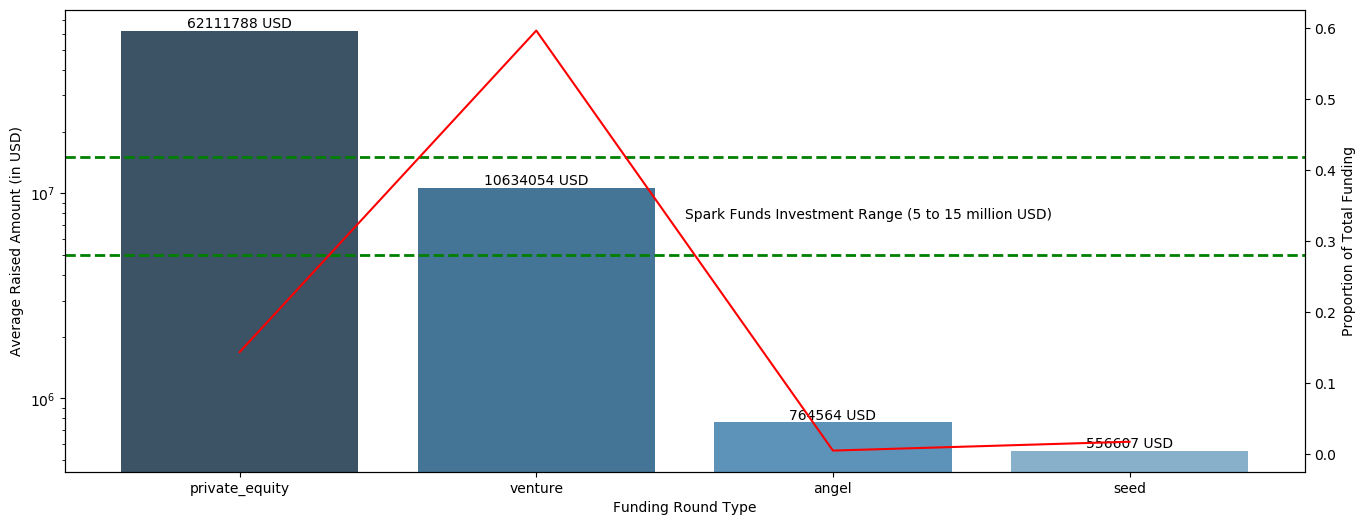

In [48]:
funding_round_top4 = funding_round_mean_sorted[(funding_round_mean_sorted.funding_round_type=='venture') | (funding_round_mean_sorted.funding_round_type=='angel') | (funding_round_mean_sorted.funding_round_type=='private_equity') | (funding_round_mean_sorted.funding_round_type=='seed')].reset_index()
plt.figure(figsize=(16, 6))
#plt.xticks(rotation=45)
plt.axhline(15000000, ls='--',color='green', linewidth=2)
plt.axhline(5000000, ls='--',color='green', linewidth=2)
plt.text(1.5,9.6**7,"Spark Funds Investment Range (5 to 15 million USD)")
ax = sns.barplot(x='funding_round_type',y='raised_amount_usd',data=funding_round_top4, palette="Blues_d")
ax2 = plt.twinx()
sns.lineplot(data=funding_round_top4['proportion'], color="red", ax=ax2)
ax.set_yscale("log")
for p in ax.patches:
    ax.annotate("%.0f USD" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
ax.set(xlabel='Funding Round Type',ylabel='Average Raised Amount (in USD)')
ax2.set(ylabel='Proportion of Total Funding')

- #### Plot 2 : <br>
    1) On x-axis, the top 9 countries based on the total funding raised are shown. <br>
    2) On y-axis, the total amount raised by companies in each countries is shown. <br>
    3) The 3 countries USA, GBR, IND are marked in green color as these are the top 3 english speaking countries. <br>
    4) The countries shown in red color are either not in top 3 or english is not their primary (de-facto) language.

[Text(0, 0.5, 'Total Raised Amount (in USD)'), Text(0.5, 0, 'Country Codes')]

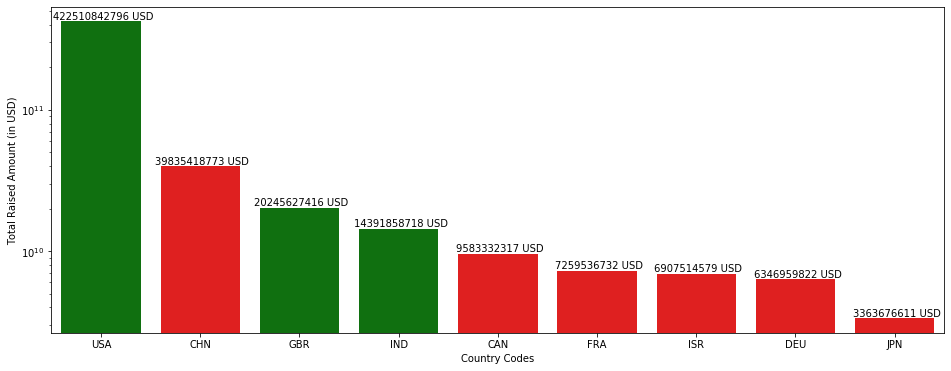

In [45]:
plt.figure(figsize=(16, 6))
colors = ["#008000","#FF0000","#008000","#008000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000"]
sns.set_palette(sns.color_palette(colors))
g=sns.barplot(x='country_code',y='raised_amount_usd',data=top9)
g.set_yscale("log")
for p in g.patches:
    g.annotate("%.0f USD" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(2, 5),
                textcoords='offset points')
g.set(xlabel='Country Codes',ylabel='Total Raised Amount (in USD)')

In [46]:
D1_counts = pd.DataFrame(D1.groupby(['country_code','main_sector'])['main_sector_investment_count'].mean())
D1_counts = D1_counts.sort_values(by='main_sector_investment_count',ascending=False).reset_index().head(3)
D2_counts = pd.DataFrame(D2.groupby(['country_code','main_sector'])['main_sector_investment_count'].mean())
D2_counts = D2_counts.sort_values(by='main_sector_investment_count',ascending=False).reset_index().head(3)
D3_counts = pd.DataFrame(D3.groupby(['country_code','main_sector'])['main_sector_investment_count'].mean())
D3_counts = D3_counts.sort_values(by='main_sector_investment_count',ascending=False).reset_index().head(3)
combined_countries = pd.concat([D1_counts,D2_counts,D3_counts])
combined_countries

,country_code,main_sector,main_sector_investment_count
0,USA,Others,8767.0
1,USA,Cleantech / Semiconductors,8268.0
2,USA,"Social, Finance, Analytics, Advertising",7822.0
0,GBR,Others,580.0
1,GBR,"Social, Finance, Analytics, Advertising",481.0
2,GBR,Cleantech / Semiconductors,466.0
0,IND,Others,332.0
1,IND,"Social, Finance, Analytics, Advertising",193.0
2,IND,"News, Search and Messaging",154.0


- #### Plot 3 : <br>
    1) On x-axis, the top 3 english speaking countries are shown. <br>
    2) On y-axis, the total fundings raised by each country in top 3 main sectors of each country are shown. <br>
    3) each country shows 3 main sectors which are the top sectors based on the investment count in that country. <br>
    4) Clearly, Others category is the top sector in all the 3 countries. <br>
    5) Cleantech / Semiconducters is the second most funded main sector in USA and GBR. <br>
    6) Social, Analytics and Advertising is the 3rd main sector in USA and GBR while in IND it is 2nd most funded sector. <br>
    7) News, Search and Messaging is the 3rd most funded sector in IND.

[Text(0, 0.5, 'Count of Fundings Raised'), Text(0.5, 0, 'Country Codes')]

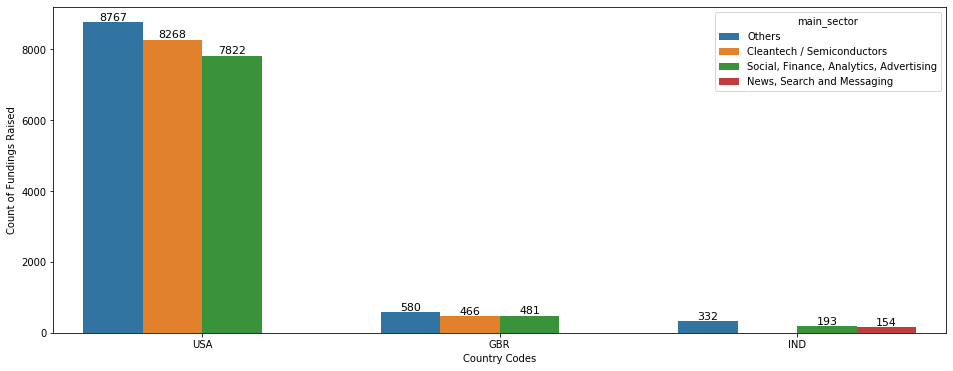

In [47]:
plt.figure(figsize=(16, 6))
sns.reset_defaults()
ax = sns.barplot(x="country_code", y="main_sector_investment_count", hue="main_sector", data=combined_countries)
ax.set_yscale("linear")
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set(xlabel='Country Codes',ylabel='Count of Fundings Raised')

- #### Based on the analysis we can conclude : <br>
    1) **Venture** Round is the best suited funding round for Spark Funds. <br>
    2) **USA**, **GBR** and **IND** are the most suited Countries to Invest in as these are the top 3 english speaking countries where maximum amount of investments are being made. <br>
    3) '**Others**' Sector is the most invested sector in the top 3 countries thus Spark Funds can also invest in this sector in any of the 3 countries. <br>
    4) **Cleantech / Semiconductors** is the second most funded main sector in USA and GBR.<br>
    5) **Social, Analytics and Advertising** is the 3rd main sector in USA and GBR while in IND it is 2nd most funded sector.<br>
    6) **News, Search and Messaging** is the 3rd most funded sector in IND.<br>
    7) Thus, Spark Funds can invest in these sectors for better returns.<br><br>
    8) We suggest Spark Funds to invest in the following 6 companies for best returns :
        1) /Organization/Social-Finance
        2) /Organization/Freescale
        3) /Organization/Oneweb
        4) /Organization/Powa-Technologies
        5) /Organization/Flipkart
        6) /Organization/Shopclues-Com